## Data Exploration

In [8]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv("Telco_data_preproc.csv", index_col = 0)

In [41]:
df.head()

,customerID,gender_proc,partner_proc,dependents_proc,phone_service_proc,churn_proc,paperless_billing_proc,multiple_lines_proc,internet_service_proc,online_security_proc,...,tech_support_proc,streaming_tv_proc,streaming_movies_proc,tenure,contract_proc,payment_method_proc,MonthlyCharges,TotalCharges,SeniorCitizen,online_backup_proc
0,7590-VHVEG,1,1,0,0,0,1,-1,1,-1,...,-1,-1,-1,1,1,1,29.85,29.85,0,1
1,5575-GNVDE,0,0,0,1,0,0,-1,1,1,...,-1,-1,-1,34,2,2,56.95,1889.50,0,-1
2,3668-QPYBK,0,0,0,1,1,1,-1,1,1,...,-1,-1,-1,2,1,2,53.85,108.15,0,1
3,7795-CFOCW,0,0,0,0,0,0,-1,1,1,...,1,-1,-1,45,2,3,42.30,1840.75,0,-1
4,9237-HQITU,1,0,0,1,1,1,-1,2,-1,...,-1,-1,-1,2,1,1,70.70,151.65,0,-1


In [11]:
df.shape

(7043, 22)

In [12]:
df.customerID.nunique() == df.shape[0]

True

Only one observation per customer, so no way to track change in customer variables over time.

In [13]:
# df.describe()

,Unnamed: 0,gender_proc,partner_proc,dependents_proc,phone_service_proc,churn_proc,paperless_billing_proc,multiple_lines_proc,internet_service_proc,online_security_proc,...,tech_support_proc,streaming_tv_proc,streaming_movies_proc,tenure,contract_proc,payment_method_proc,MonthlyCharges,TotalCharges,SeniorCitizen,online_backup_proc
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.495244,0.483033,0.299588,0.903166,0.265370,0.592219,-0.156325,1.439585,-0.426665,...,-0.419566,-0.231293,-0.224194,32.371149,1.690473,2.315633,64.761692,2279.734304,0.162147,-0.310237
std,2033.283305,0.500013,0.499748,0.458110,0.295752,0.441561,0.491457,0.987776,0.496372,0.904474,...,0.907790,0.972953,0.974614,24.559481,0.833755,1.148907,30.090047,2266.794470,0.368612,0.950727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,0.000000,1.000000,1.000000,18.250000,0.000000,0.000000,-1.000000
25%,1760.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,9.000000,1.000000,1.000000,35.500000,398.550000,0.000000,-1.000000
50%,3521.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,29.000000,1.000000,2.000000,70.350000,1394.550000,0.000000,-1.000000
75%,5281.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,55.000000,2.000000,3.000000,89.850000,3786.600000,0.000000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,72.000000,3.000000,4.000000,118.750000,8684.800000,1.000000,1.000000


In [42]:
# splitting the dataset in 80/20 train/test
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [47]:
# saving train/test split
# df_train.to_csv("telco_train.csv")
# df_test.to_csv("telco_test.csv")

## Visualizing churn / no churn using PCA

In [48]:
df = pd.read_csv("telco_train.csv", index_col=0)

In [52]:
from sklearn.preprocessing import StandardScaler

y = df.churn_proc.values
df_x = df.drop(labels = ["customerID", "churn_proc"], axis=1)
X = df_x.values

X = StandardScaler().fit_transform(X)

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, 
                          columns = ["PC1", "PC2"])

In [54]:
finalDf = pd.concat([principalDf, df.churn_proc], axis=1)

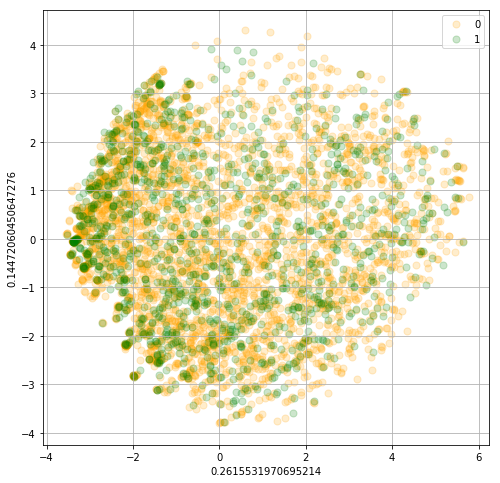

In [61]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

var = pca.explained_variance_ratio_
ax.set_xlabel(var[0])
ax.set_ylabel(var[1])

churn = [0, 1]
colors = ('orange', 'green')
for churn, color in zip(churn, colors):
    indicesToKeep = finalDf.churn_proc == churn
    ax.scatter(finalDf.loc[indicesToKeep, "PC1"], 
               finalDf.loc[indicesToKeep, "PC2"], 
               c = color, 
               s = 50,
               alpha = 0.2)

ax.legend(["0", "1"])
ax.grid()

0.2615531970695214